<a href="https://colab.research.google.com/github/laveena-majeed/Cat-Dog-Image-Classification/blob/main/dogs_vs_cats_image_classification_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.05G/1.06G [00:05<00:00, 254MB/s]
100% 1.06G/1.06G [00:05<00:00, 214MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip' ,'r')
zip_ref.extractall('/content')
zip_ref.close()

Importing the required Libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,BatchNormalization,Dropout
from tensorflow.keras import regularizers


In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#Normalise
def process(image,label):
    image=tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
#Create CNN model

model= Sequential()
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu', ))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu', ))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 256, 256, 3)       12        
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 128, 128, 3)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 126, 126, 64)      1792      
                                                                 
 batch_normalization_1 (Bat  (None, 126, 126, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 63, 63, 64)        0         
 g2D)                                                 

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 52s 74ms/step - loss: 0.6296 - accuracy: 0.6471 - val_loss: 0.6135 - val_accuracy: 0.6644
Epoch 2/10
625/625 [==============================] - 48s 76ms/step - loss: 0.5273 - accuracy: 0.7332 - val_loss: 0.5157 - val_accuracy: 0.7500
Epoch 3/10
625/625 [==============================] - 50s 79ms/step - loss: 0.4248 - accuracy: 0.8016 - val_loss: 0.5412 - val_accuracy: 0.7674
Epoch 4/10
625/625 [==============================] - 46s 72ms/step - loss: 0.2803 - accuracy: 0.8801 - val_loss: 0.6309 - val_accuracy: 0.7552
Epoch 5/10
625/625 [==============================] - 45s 72ms/step - loss: 0.1607 - accuracy: 0.9359 - val_loss: 0.8586 - val_accuracy: 0.7440
Epoch 6/10
625/625 [==============================] - 50s 79ms/step - loss: 0.0947 - accuracy: 0.9654 - val_loss: 1.1438 - val_accuracy: 0.7332
Epoch 7/10
625/625 [==============================] - 46s 73ms/step - loss: 0.0724 - accuracy: 0.9747 - val_loss: 1.2288 - val_accuracy:

In [ ]:
model.save('cat_dog_classifier.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


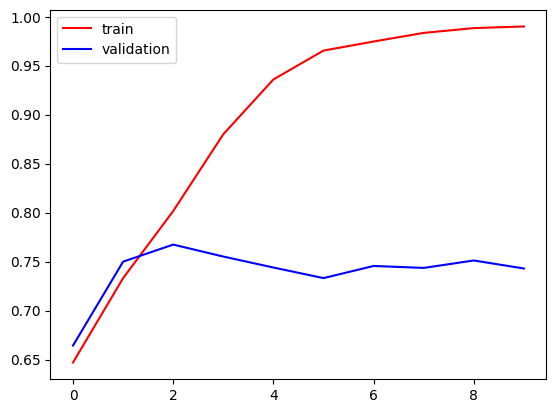

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

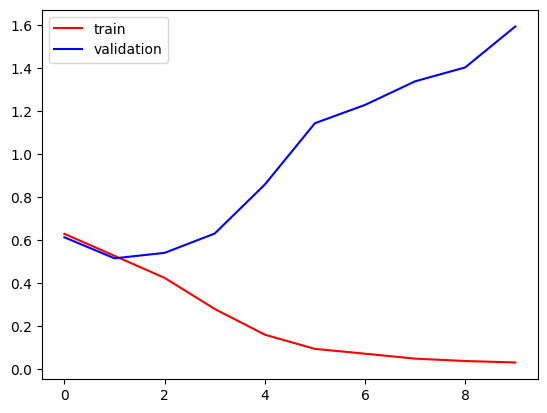

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

# For improving the performance of image classification model, we add BatchNormalization Layers and Dropout Layers

In [ ]:
#Create CNN model

model= Sequential()
model.add( BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu', ))
model.add( BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu', ))
model.add( BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 57s 84ms/step - loss: 1.5058 - accuracy: 0.5586 - val_loss: 0.7497 - val_accuracy: 0.6248
Epoch 2/10
625/625 [==============================] - 50s 80ms/step - loss: 0.6416 - accuracy: 0.6250 - val_loss: 0.6428 - val_accuracy: 0.6940
Epoch 3/10
625/625 [==============================] - 50s 80ms/step - loss: 0.5692 - accuracy: 0.6878 - val_loss: 0.5256 - val_accuracy: 0.7146
Epoch 4/10
625/625 [==============================] - 57s 91ms/step - loss: 0.5039 - accuracy: 0.7436 - val_loss: 0.5128 - val_accuracy: 0.7540
Epoch 5/10
625/625 [==============================] - 53s 85ms/step - loss: 0.4622 - accuracy: 0.7765 - val_loss: 1.1223 - val_accuracy: 0.6820
Epoch 6/10
625/625 [==============================] - 52s 82ms/step - loss: 0.4352 - accuracy: 0.7951 - val_loss: 0.5729 - val_accuracy: 0.7520
Epoch 7/10
625/625 [==============================] - 54s 86ms/step - loss: 0.3686 - accuracy: 0.8252 - val_loss: 0.4893 - val_accuracy:

In [ ]:
model.save('cat_dog_classifier.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


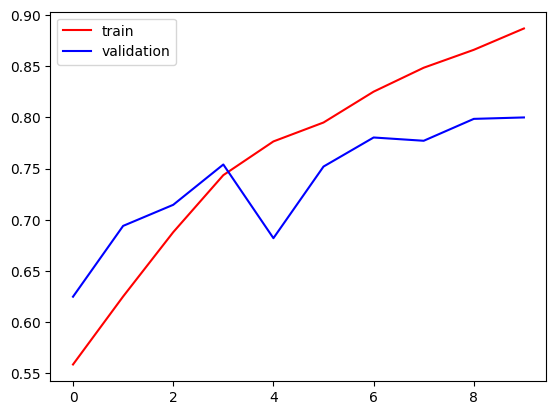

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

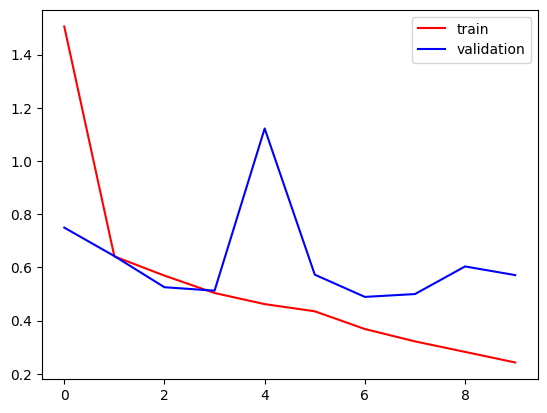

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2
import matplotlib.pyplot as plt


In [ ]:
test_img = cv2.imread('/content/cat.jpg')

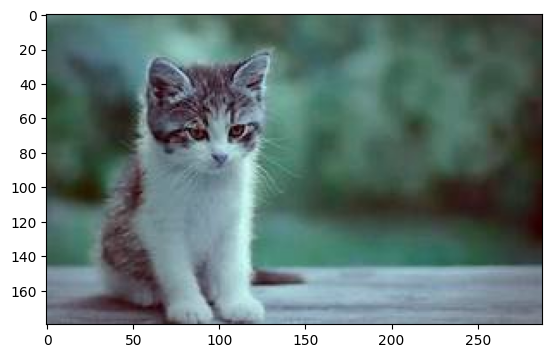

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape


(180, 288, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 163ms/step


array([[0.00668698]], dtype=float32)

In [ ]:
test_img = cv2.imread('/content/dog.jpg')

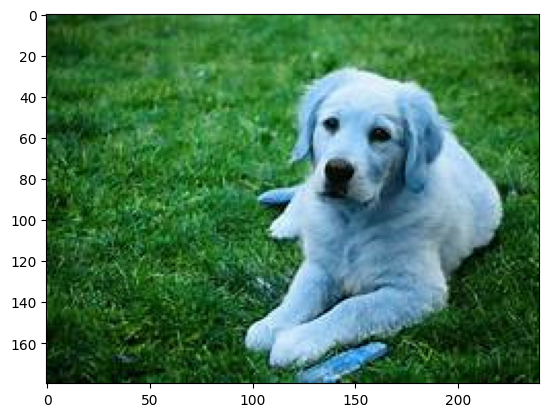

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape


(180, 240, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 68ms/step


array([[0.9964322]], dtype=float32)